In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('Resources\MA_data.csv')

# Extract features X and target y

X = data['house_size'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Define the architecture of the MLP model
model = Sequential([
    Dense(256, activation='relu', input_shape=(1,)),
    Dense(128, activation='relu'),
    Dense(1)  # Output layer with a single neuron
])


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [6]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100


2360/2360 [==============================] - 4s 1ms/step - loss: 1485795491840.0000 - mean_absolute_error: 590524.9375 - val_loss: 1466771832832.0000 - val_mean_absolute_error: 579652.8125
Epoch 2/100
2360/2360 [==============================] - 4s 2ms/step - loss: 1302808887296.0000 - mean_absolute_error: 553879.8125 - val_loss: 1466694631424.0000 - val_mean_absolute_error: 581468.3750
Epoch 3/100
2360/2360 [==============================] - 4s 2ms/step - loss: 1301524512768.0000 - mean_absolute_error: 555174.6250 - val_loss: 1472830636032.0000 - val_mean_absolute_error: 557863.8750
Epoch 4/100
2360/2360 [==============================] - 4s 2ms/step - loss: 1302485139456.0000 - mean_absolute_error: 553454.4375 - val_loss: 1466762002432.0000 - val_mean_absolute_error: 575159.2500
Epoch 5/100
2360/2360 [==============================] - 3s 1ms/step - loss: 1302559195136.0000 - mean_absolute_error: 553986.3750 - val_loss: 1467750416384.0000 - val_mean_absolute_error: 56911

In [8]:
# Evaluate the model on the testing set
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

656/656 [==============================] - 1s 843us/step - loss: 1433001000960.0000 - mean_absolute_error: 571356.3125
Mean Absolute Error: 571356.3125


In [9]:
# Make predictions
actual_prices = data['price']
house_sizes = X[:300]
predicted_prices = model.predict(house_sizes)
print("Predicted prices:")
for size, price in zip(house_sizes.flatten(), predicted_prices.flatten()):
    print(f"House size: {size} sqft, Predicted price: {price:.2f}")

10/10 [==============================] - 0s 1ms/step
Predicted prices:
House size: 676.0 sqft, Predicted price: 214668.20
House size: 1196.0 sqft, Predicted price: 462678.84
House size: 2314.0 sqft, Predicted price: 995901.75
House size: 1276.0 sqft, Predicted price: 500834.31
House size: 1732.0 sqft, Predicted price: 718320.62
House size: 1800.0 sqft, Predicted price: 750752.75
House size: 1476.0 sqft, Predicted price: 596223.06
House size: 2910.0 sqft, Predicted price: 1280160.12
House size: 1968.0 sqft, Predicted price: 830879.38
House size: 1607.0 sqft, Predicted price: 658702.69
House size: 2847.0 sqft, Predicted price: 1250112.62
House size: 4366.0 sqft, Predicted price: 1974590.00
House size: 3879.0 sqft, Predicted price: 1742318.50
House size: 1280.0 sqft, Predicted price: 502742.12
House size: 3246.0 sqft, Predicted price: 1440413.38
House size: 1748.0 sqft, Predicted price: 725951.69
House size: 1814.0 sqft, Predicted price: 757430.00
House size: 1128.0 sqft, Predicted price:

In [10]:
predicted_prices.flatten()


array([ 214668.2  ,  462678.84 ,  995901.75 ,  500834.3  ,  718320.6  ,
        750752.75 ,  596223.06 , 1280160.1  ,  830879.4  ,  658702.7  ,
       1250112.6  , 1974590.   , 1742318.5  ,  502742.12 , 1440413.4  ,
        725951.7  ,  757430.   ,  430246.7  , 1544863.9  ,  914344.4  ,
       1019272.   ,  733582.8  ,  881435.3  ,  535651.25 ,  635809.3  ,
        655364.06 ,  963469.6  ,  846141.44 , 1143754.4  ,  403537.8  ,
       1143754.4  , 1326900.6  ,  489387.7  ,  714028.1  , 1212434.2  ,
        614346.9  ,  618639.4  ,  663472.1  ,  467925.22 ,  385414.   ,
        864742.3  ,  802262.7  ,  960607.94 ,  627224.4  ,  891928.06 ,
        518958.2  ,  899559.2  , 1969820.5  , 1036441.94 ,  771738.25 ,
        464586.62 , 1127538.2  ,  788908.25 ,  197498.23 , 1866800.9  ,
        716412.9  ,  622454.94 ,  733582.8  ,  708781.75 , 1250112.6  ,
        669672.3  ,  881435.3  ,  194636.56 , 4415587.   ,  706874.   ,
        464586.62 ,  452663.06 ,  516096.56 , 2287942.   ,  9811

In [11]:
import math

In [12]:
predicted_data = pd.DataFrame({'House Size (sqft)': house_sizes.flatten(), 'Predicted Price ($)': predicted_prices.flatten()})

pd.set_option('display.float_format', lambda x: '%.2f' % x)

predicted_data['Predicted Price ($)'] = predicted_data['Predicted Price ($)'].apply(lambda x: math.ceil(x))
predicted_data['Actual Price ($)'] = actual_prices
# Display the DataFrame
predicted_data

,House Size (sqft),Predicted Price ($),Actual Price ($)
0,676.00,214669,180000.00
1,1196.00,462679,239900.00
2,2314.00,995902,525000.00
3,1276.00,500835,289900.00
4,1732.00,718321,275000.00
...,...,...,...
295,2418.00,1045504,249900.00
296,1514.00,614347,249900.00
297,1296.00,510374,329000.00
298,3902.00,1753289,369900.00


656/656 [==============================] - 1s 811us/step


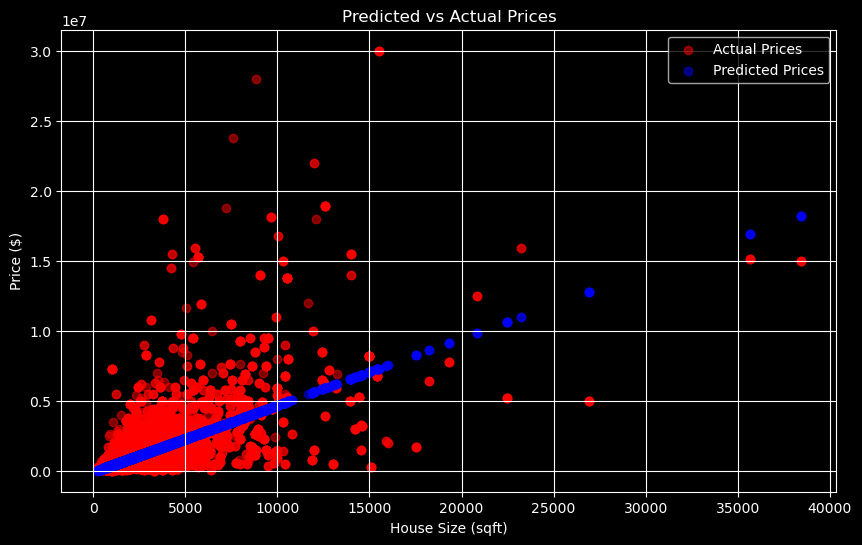

In [13]:
import matplotlib.pyplot as plt

# Scatter plot of predicted prices vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual Prices', alpha=0.5)
plt.scatter(X_test, model.predict(X_test), color='blue', label='Predicted Prices', alpha=0.5)
plt.xlabel('House Size (sqft)')
plt.ylabel('Price ($)')
plt.title('Predicted vs Actual Prices')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
from sklearn.metrics import r2_score

# Calculate R-squared value
r_squared = r2_score(y_test, model.predict(X_test))

print("R-squared value:", r_squared)

656/656 [==============================] - 1s 999us/step
R-squared value: 0.40462588261089827
